In [12]:
# import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as statsmodels
import seaborn as sns

from scipy import stats
from pandas import Series

# import dataset
dataset = pd.read_csv(
    "https://course-resources.minerva.edu/uploaded_files/mu/00294343-2463/sampled-books.csv"
)


In [13]:
# show the first 5 rows of the dataset
dataset.head()


,bookID,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,157,Anna Karenina,Leo Tolstoy/Constance Garnett/Amy Mandelker,4.05,1593081774,9781593081775,eng,803,303,48,8/26/2004,Barnes & Noble
1,570,HTML XHTML and CSS (Visual Quickstart Guide),Elizabeth Castro,3.80,321430840,9780321430847,en-US,456,549,42,8/1/2006,Peachpit Press
2,848,No Price Too High: A Pentecostal Preacher Beco...,Alex C. Jones/Diane M. Hanson/Stephen K. Ray,4.27,898709199,9780898709193,en-GB,259,51,7,4/30/2006,Ignatius Press
3,866,Fullmetal Alchemist Vol. 9 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.57,142150460X,9781421504605,eng,192,9013,153,9/19/2006,VIZ Media LLC
4,870,Fullmetal Alchemist Vol. 1 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.50,1591169208,9781591169208,eng,192,111091,1427,5/3/2005,VIZ Media LLC


In [14]:
# assigning x and y values to variables
x_values = dataset["num_pages"]
y_values = dataset["average_rating"]

# calculating and storing means (built-in pandas) and standard deviations using the numpy function
mean_x = x_values.mean()
mean_y = y_values.mean()
SD_x = y_values.std(ddof=1)
SD_y = y_values.std(ddof=1)

# printing descriptive statistics for x variable:
# mean, median (numpy), mode (build-in function), standard deviation, range(maximum value minus minimum one)
print("Number of pages")
print("Mean = ", mean_x)
print("Median = ", x_values.median())
print("Mode = ", list(x_values.mode()))
print("Standard Deviation = ", SD_x)
print("Range = ", max(x_values) - min(x_values))

# printing descriptive statistics for y variable:
# mean, median (numpy), mode (build-in function), standard deviation, range(maximum value minus minimum one)
print("Average rating")
print("Mean = ", mean_y)
print("Median = ", y_values.median())
print("Mode = ", list(y_values.mode()))
print("Standard Deviation = ", SD_y)
print("Range = ", max(y_values) - min(y_values))


Number of pages
Mean =  346.47
Median =  307.5
Mode =  [96, 208, 384]
Standard Deviation =  0.289940974759038
Range =  1392
Average rating
Mean =  3.9484000000000004
Median =  3.99
Mode =  [4.07]
Standard Deviation =  0.289940974759038
Range =  2.0200000000000005


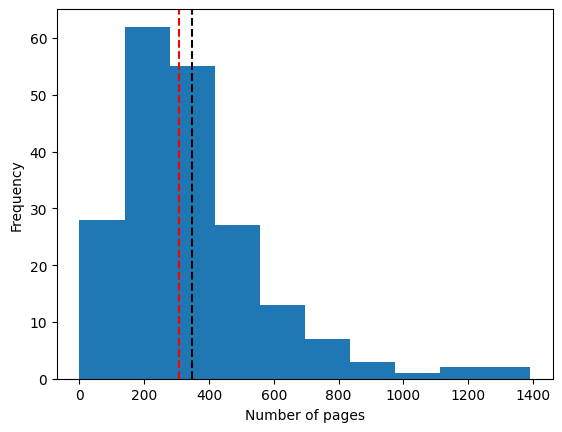

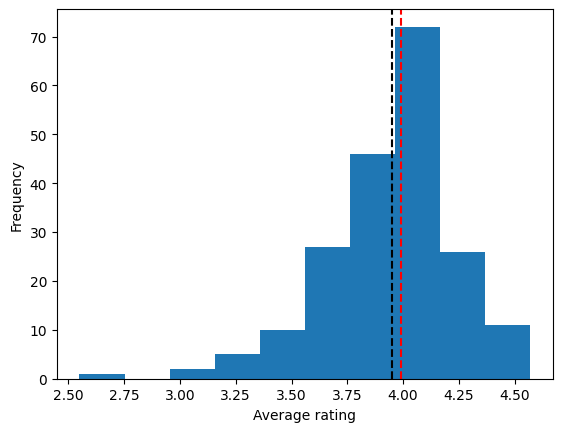

In [15]:
# plotting histogram for x variable
plt.hist(x_values)
# displaying the black line which shows the mean
plt.axvline(x_values.mean(), color="k", linestyle="dashed")
# displaying the red line which shows the median
plt.axvline(x_values.median(), color="red", linestyle="dashed")  # type: ignore
# labeling axes
plt.xlabel("Number of pages")
plt.ylabel("Frequency")
plt.show()

# plotting histogram for y variable
plt.hist(y_values)
# displaying the black line which shows the mean
plt.axvline(y_values.mean(), color="k", linestyle="dashed")
# displaying the red line which shows the median
plt.axvline(y_values.median(), color="red", linestyle="dashed")  # type: ignore
# labeling axes
plt.xlabel("Average rating")
plt.ylabel("Frequency")
plt.show()


/tmp/ipykernel_55935/1252939696.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(regressionmodel.resid, kde=False, axlabel="Residuals", color="red")


<AxesSubplot: xlabel='Residuals'>

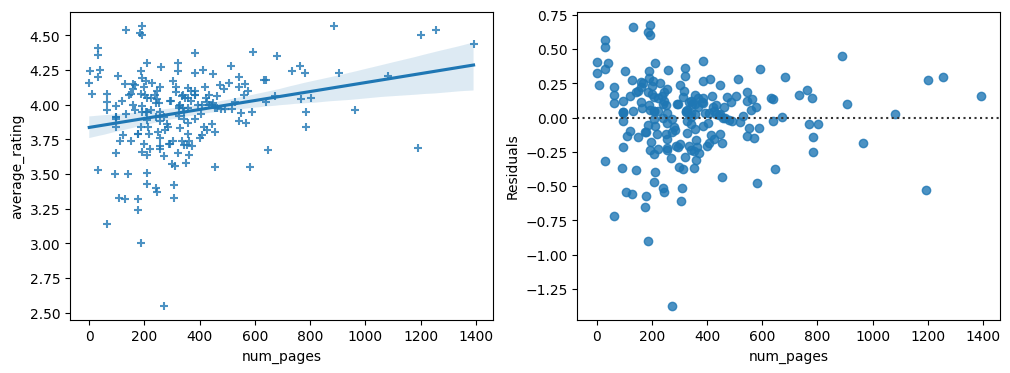

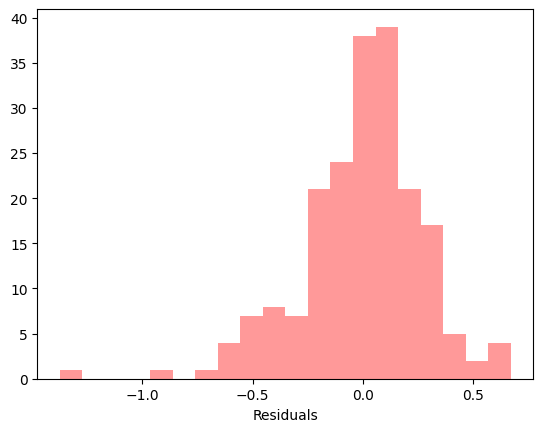

In [16]:
# adds a constant to compute y intercept
X = statsmodels.add_constant(x_values)
# least squares line - "OLS"
regressionmodel = statsmodels.OLS(y_values, X).fit()
# displaying two plots in one row
fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=True, figsize=(12, 4))
# scatter plot with regression line
sns.regplot(x="num_pages", y="average_rating", data=dataset, marker="+", ax=ax1)
# residuals scatter plot
sns.residplot(x="num_pages", y="average_rating", data=dataset, ax=ax2)
# labeling y-axis
ax2.set(ylabel="Residuals")
# setting minimum and maximum value for y-axis
ax2.set_ylim(np.min(regressionmodel.resid) - 0.1, np.max(regressionmodel.resid) + 0.1)
# historgam of residuals
plt.figure()
# displaying plots
sns.distplot(regressionmodel.resid, kde=False, axlabel="Residuals", color="red")


In [17]:
def correlation_coefficient(x_data: Series, y_data: Series) -> float:
    """Calculates correlation coefficient (Pearson's r) between two sets of variables."""

    # creating a list to store standard units
    std_units = []

    # calculating mean for x and y variables
    mean_x = x_data.mean()
    mean_y = y_data.mean()
    # calculating standard deviation for x variables and for y variables
    SD_x = x_data.std(ddof=1)
    SD_y = y_data.std(ddof=1)

    # iterating through data
    for i in range(len(x_data)):
        # converting datapoints into standard units
        x = (x_data[i] - mean_x) / SD_x
        y = (y_data[i] - mean_y) / SD_y
        # adding converted points to a new list
        std_unit = (x, y)
        std_units.append(std_unit)

    correlation = 0
    # iterating through standard units
    for i in std_units:
        # calculating the sum of multiplication x by y standard units
        correlation += i[0] * i[1]
    # dividing correlation by the number of datapoint to calculate the average
    correlation /= len(std_units)

    return correlation


r = correlation_coefficient(x_values, y_values)
print(f"Correlation coefficient: r = {r}")


Correlation coefficient: r = 0.2603219348032958


In [18]:
def slope(x_data: Series, y_data: Series) -> float:
    """Calculates slope of a regression line."""

    # calculating standard deviation for x variables and for y variables
    SD_x = x_data.std(ddof=1)
    SD_y = y_data.std(ddof=1)

    # calculating slope using a formula b1=(Sy/Sx)*r
    slope = (SD_y * correlation_coefficient(x_data, y_data)) / SD_x
    return slope


def intercept(x_data: Series, y_data: Series) -> float:
    """Calculates intercept of a regression line."""

    # calculating mean for x and y variables
    mean_x = x_data.mean()
    mean_y = y_data.mean()

    # calculating intercept using formulas y-y_mean=b1(x-x_mean) and y=b1*x + b0
    intercept = mean_y - slope(x_data, y_data) * mean_x
    return intercept


print(f"Slope: b1 = {slope(x_values, y_values)}")
print(f"Intersept: b0 = {intercept(x_values, y_values)}")

# displaying the formula of regression line
print(
    f"Regression line: y = {round(slope(x_values, y_values), 5)} * x + {round(intercept(x_values, y_values), 3)}"
)


Slope: b1 = 0.0003217975685718675
Intersept: b0 = 3.8369067964169052
Regression line: y = 0.00032 * x + 3.837


In [19]:
def coefficient_of_determination(x_data: Series, y_data: Series) -> float:
    """Calculates coefficient of determination (R^2) of a regression line."""

    # calculating mean for y variable
    mean_y = y_data.mean()

    # calculating the regression sum of squares
    ssr = 0
    # iterating through x values
    for x in x_data:
        # using x in regression formula to get estimated y
        y_i = slope(x_data, y_data) * x + intercept(x_data, y_data)
        ssr += (y_i - mean_y) ** 2

    # calculating the total sum of squares
    ssto = 0
    # iterating through y values
    for y in y_data:
        ssto += (y - mean_y) ** 2

    # calculating coefficient of determination by dividing ssr by ssto
    R_squared = ssr / ssto
    return R_squared


print(
    f"Coefficient of determination: R^2 = {coefficient_of_determination(x_values, y_values)}",
)


Coefficient of determination: R^2 = 0.06776750973973142


In [20]:
def standard_error(x_data, y_data):
    """Calculates standard error of a regression line."""

    # calculating standard deviation for x variables and for y variables
    SD_x = x_data.std(ddof=1)
    SD_y = y_data.std(ddof=1)

    # calculating the number of elements in the sample
    n = len(x_data)
    # calculating standard error for the slope
    r_squared = coefficient_of_determination(x_data, y_data)
    SE_b1 = (((1 - r_squared) / (n - 2)) ** 0.5) * SD_y / SD_x
    return SE_b1


def hypothesis_testing(x_data, y_data, tails, null):
    """Calculates t-score and p-value for a hypothesis testing."""

    # calculating the number of elements in the sample
    n = len(x_data)
    # calculating t-score using formula
    t_score = np.abs(slope(x_data, y_data) - null) / standard_error(x_data, y_data)

    # calculating degree of freedom: number of elements minus 2
    # calculating p-value using percentile and multiplying by the number of tails
    p_value = (1 - stats.t.cdf(t_score, n - 2)) * tails
    return t_score, p_value


t_score, p_value = hypothesis_testing(x_values, y_values, 2, 0)
print(f"Standard Error for the slope: SE(b1) = {standard_error(x_values, y_values)}")
print(f"T-score = {t_score}")
print(f"P-value = {p_value}")


Standard Error for the slope: SE(b1) = 8.482063457400434e-05
T-score = 3.7938594799253176
P-value = 0.00019700613176731885


In [21]:
def confidence_interval(x_data, y_data, confidence):
    """Calculates confidence interval for a regression line."""

    n = len(x_data)
    # the t-score is calculated using the area of confidence interval in the middle + the left tail
    # this way, we get the are of percentile of needed t-score
    t_score = stats.t.ppf(confidence + (1 - confidence) / 2, n - 2)
    # calculating the lower and upper bounds of the confidence interval
    lower = slope(x_data, y_data) - t_score * standard_error(x_data, y_data)
    upper = slope(x_data, y_data) + t_score * standard_error(x_data, y_data)

    return t_score, lower, upper


t, lower, upper = confidence_interval(x_values, y_values, 0.95)
print(f"t-score = {t}")
print(f"95% confidence interval = [{lower}, {upper}]")


t-score = 1.9720174778338955
95% confidence interval = [0.00015452979471096897, 0.0004890653424327661]
